In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df =pd.read_csv('/Users/michellereismoreno/Downloads/ev_stations_v1.csv')
df.tail()

/Users/michellereismoreno/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
50284,ELEC,VIP LOT STATION1,1501 Kirkwood Meadows Dr,NaN,Markleeville,CA,96120,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50285,ELEC,Prunedale Shopping Center,8065 San Miguel Canyon Rd,NaN,Salinas,CA,93907,NaN,877-455-3833,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50286,ELEC,Beaverton Electric Avenue,11665 SW Beaverton Hillsdale Hwy,NaN,Beaverton,OR,97005,NaN,855-900-7584,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50287,ELEC,Shell - Inman,2040 Highway 292,NaN,Inman,SC,29349,NaN,855-900-7584,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50288,ELEC,"Westfield Trumbull (Trumbull, CT)",5065 Main Street,NaN,Trumbull,CT,6611,NaN,833-632-2778,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# checking for duplicate values

df.duplicated().values.any()

False

In [4]:
df.info()  # info on DataFrame including index dtype and columns, non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50289 entries, 0 to 50288
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    50289 non-null  object 
 1   Station Name                      50289 non-null  object 
 2   Street Address                    50256 non-null  object 
 3   Intersection Directions           2491 non-null   object 
 4   City                              50289 non-null  object 
 5   State                             50289 non-null  object 
 6   ZIP                               50289 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     47211 non-null  object 
 9   Status Code                       50289 non-null  object 
 10  Expected Date                     147 non-null    object 
 11  Groups With Access Code           50289 non-null  object 
 12  Acce

In [5]:
# narrow down to use only 4 columns of the 65
df = df[["State", "Open Date", "Latitude", "Longitude"]]
df.tail()

,State,Open Date,Latitude,Longitude
50284,CA,2022-01-14,38.684660,-120.065169
50285,CA,2022-01-14,36.801716,-121.664153
50286,OR,2022-01-14,45.489030,-122.798151
50287,SC,2022-01-14,35.082476,-82.058433
50288,CT,2022-01-14,41.228951,-73.223944


In [6]:
df["Open Date"].dtype

dtype('O')

In [7]:
df["Open Date"]= df["Open Date"].apply(pd.to_datetime)  # converts Open Date Object 

In [8]:
df["Open Date"].min()   # earliest EV station

Timestamp('1995-08-30 00:00:00')

In [9]:
df["Latitude"]

0        34.248319
1        34.052542
2        34.040539
3        34.059133
4        33.759802
           ...    
50284    38.684660
50285    36.801716
50286    45.489030
50287    35.082476
50288    41.228951
Name: Latitude, Length: 50289, dtype: float64

In [10]:
df["Longitude"]

0       -118.387971
1       -118.448504
2       -118.271387
3       -118.248589
4       -118.096665
            ...    
50284   -120.065169
50285   -121.664153
50286   -122.798151
50287    -82.058433
50288    -73.223944
Name: Longitude, Length: 50289, dtype: float64

In [11]:
NJ = df[df["State"]=='NJ']
CT = df[df["State"]=='CT']
NY= df[df["State"]=='NY']

In [12]:
tristate = pd.concat([NJ,CT, NY])

In [13]:
tristate.head()

,State,Open Date,Latitude,Longitude
150,NJ,2010-05-15,40.286518,-74.807516
641,NJ,2011-10-15,40.350118,-74.662732
729,NJ,2012-04-15,40.663848,-74.216585
753,NJ,2012-01-15,39.934849,-75.029991
1046,NJ,2012-01-31,40.917338,-73.997447


In [14]:
tristate.reset_index(drop = True, inplace = True)  # makes dropping missing, and make permanent

In [15]:
tristate.drop(3876, inplace = True)

In [16]:
evOpen= df.groupby("Open Date").count()["State"]

In [17]:
newSort= evOpen.sort_values(ascending = False)
newSort= newSort.iloc[:10]

In [18]:
newSort

Open Date
2021-01-27    10413
2020-06-12     3434
2018-11-01      905
2021-10-25      843
2012-01-31      714
2020-11-03      677
2021-01-15      654
2017-09-01      534
2011-03-15      470
2019-08-15      335
Name: State, dtype: int64

In [19]:
x = newSort.index
x

DatetimeIndex(['2021-01-27', '2020-06-12', '2018-11-01', '2021-10-25',
               '2012-01-31', '2020-11-03', '2021-01-15', '2017-09-01',
               '2011-03-15', '2019-08-15'],
              dtype='datetime64[ns]', name='Open Date', freq=None)

In [20]:
h = newSort.values
h

array([10413,  3434,   905,   843,   714,   677,   654,   534,   470,
         335])

In [21]:
newSort.values

array([10413,  3434,   905,   843,   714,   677,   654,   534,   470,
         335])

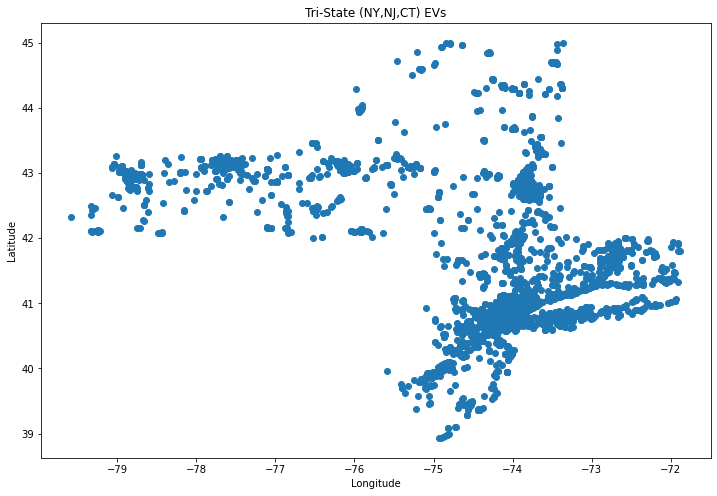

In [22]:
plt.figure(figsize=(12,8))
plt.title("Tri-State (NY,NJ,CT) EVs")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.scatter(tristate["Longitude"], tristate["Latitude"])
plt.savefig("EVplot.png")

In [23]:
tristate[tristate["Longitude"]==0]

,State,Open Date,Latitude,Longitude


In [24]:
tristate[tristate["Latitude"]==0]

,State,Open Date,Latitude,Longitude


In [25]:
data

NameError: name 'data' is not defined

In [26]:
EVopen= df.groupby('Open Date').count()

In [27]:
EVopen.reset_index(inplace= True)

In [32]:
EVopen.sort_values(by= 'State', inplace = True, ascending= False)

In [35]:
EVdata= EVopen.iloc[:10]  # grab first 10

Text(0.5, 1.0, 'EVs installed')

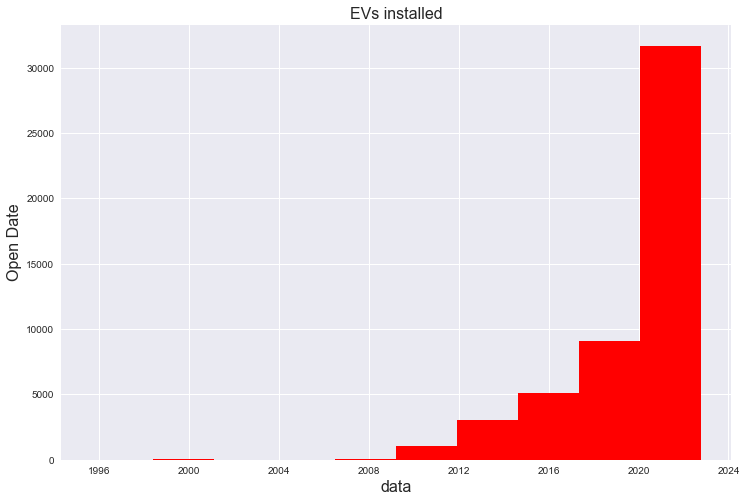

In [43]:
plt.figure(figsize=(12, 8))

plt.hist( df["Open Date"], color = 'red')
plt.xlabel('data', fontsize=16)

plt.ylabel('Open Date', fontsize=16)
plt.title('EVs installed', fontsize=16)

In [ ]:
model = DecisionTreeClassifier()#create object "model" & set it to new instance of this class